In [1]:
import numpy as np
from sklearn import metrics
import csv

with open('score.csv', newline='') as f:
    reader = csv.reader(f)
    s = list(reader)
tmp = s[0]
score = np.array([float(item) for item in tmp])

with open('label.csv', newline='') as f:
    reader = csv.reader(f)
    l = list(reader)
tmp = l[0]
label = np.array([float(item) for item in tmp])
y=label.copy()

threshold=0.05 # use thredhold = 0.05
y_pred=score.copy()
y_pred[y_pred>threshold]=1
y_pred[y_pred<threshold]=0

fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label=1)

In [2]:
fpr

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.00625, 0.00625, 0.01875, 0.01875, 0.03125, 0.03125,
       0.04375, 0.05   , 0.05625, 0.05625, 0.06875, 0.06875, 0.075  ,
       0.075  , 0.08125, 0.0875 , 0.0875 , 0.10625, 0.10625, 0.125  ,
       0.125  , 0.15   , 0.15   , 0.15625, 0.15625, 0.20625, 0.20625,
       0.21875, 0.21

In [3]:
tpr

array([0.     , 0.00125, 0.01875, 0.02125, 0.11   , 0.1125 , 0.2575 ,
       0.26   , 0.2975 , 0.3    , 0.34   , 0.3425 , 0.35375, 0.35625,
       0.375  , 0.3775 , 0.37875, 0.38125, 0.39875, 0.40125, 0.4075 ,
       0.41   , 0.42375, 0.42625, 0.4375 , 0.44   , 0.4875 , 0.495  ,
       0.51375, 0.5175 , 0.53   , 0.5325 , 0.545  , 0.5475 , 0.565  ,
       0.5675 , 0.57375, 0.57625, 0.5775 , 0.58   , 0.59625, 0.59875,
       0.61625, 0.61875, 0.6275 , 0.63   , 0.63875, 0.64125, 0.64875,
       0.65125, 0.6575 , 0.66   , 0.6825 , 0.685  , 0.6925 , 0.69625,
       0.70875, 0.71125, 0.71875, 0.72125, 0.765  , 0.7675 , 0.80375,
       0.80625, 0.855  , 0.8575 , 0.86875, 0.87125, 0.89125, 0.89375,
       0.925  , 0.925  , 0.935  , 0.935  , 0.93625, 0.93625, 0.9375 ,
       0.9375 , 0.93875, 0.93875, 0.94125, 0.94125, 0.94375, 0.94375,
       0.945  , 0.94625, 0.94625, 0.94875, 0.94875, 0.95125, 0.95125,
       0.9525 , 0.9525 , 0.95375, 0.95375, 0.955  , 0.955  , 0.95625,
       0.95625, 0.95

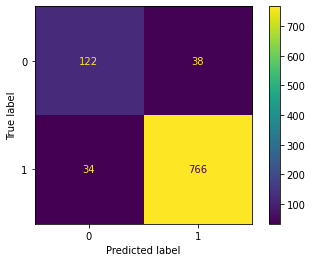

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [22]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("TN=",TN,"FP=",FP,"FN=",FN,"TP=",TP)
print("precision=",metrics.precision_score(y, y_pred))
print("accuracy=",metrics.accuracy_score(y, y_pred))
print("recall=",metrics.recall_score(y, y_pred, average='macro'))
print("f1_score=",metrics.f1_score(y, y_pred))

TN= 122 FP= 38 FN= 34 TP= 766
precision= 0.9527363184079602
accuracy= 0.925
recall= 0.86
f1_score= 0.9551122194513716


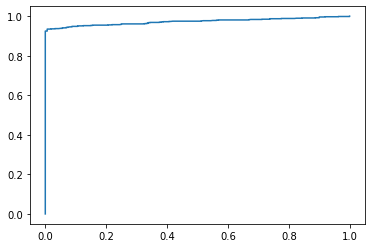

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

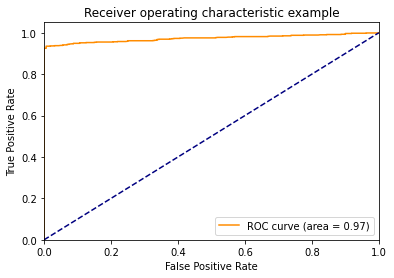

AUC= 0.972921875


In [23]:
from sklearn.metrics import roc_curve, auc
plt.figure()
roc_auc = auc(fpr, tpr)
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
print('AUC=',roc_auc)